In [1]:
# 1) Importing libraries, loading dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"/Users/niccolocomar/Documents/Kaggle/Diabetes Prediction Dataset/diabetes_prediction_dataset.csv")

In [2]:
# 2) Exploratory dataset analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [3]:
df.shape

(100000, 9)

In [4]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [5]:
# Quick features description:

# - gender: M/F;
# - age: ranges from 0 to 80 years old;
# - hypertension: binary variable (0: no, 1: yes);
# - heart_disease: binary variable (0: no, 1: yes);
# - smoking_history: categorical variable;
# - bmi: body mass index (floating variable). BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese;
# - HbA1c_level: values of Hemoglobin A1c. A1c measures a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes;
# - blood_glucose_level: it measures the amount of glucose in the patient system. High glucose levels are a key indicator of diabetes;
# - diabetes: this is our target variable. It is a binary variable, having values of either 0 (no diabetes) or 1 (patient having diabetes).

In [6]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [9]:
df.isna().sum()

#No Nan Values in our dataset

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
df.duplicated().sum() 

3854

In [11]:
df[df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [12]:
# I won’t delete the duplicate values, as they represent values which can be associated to multiple individuals

<AxesSubplot:>

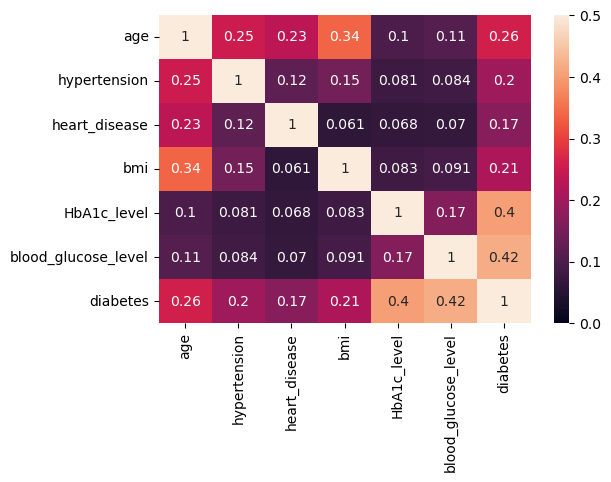

In [13]:
# 3) Data Analysis


df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), vmin=0, vmax=0.5, annot=True)

<AxesSubplot:>

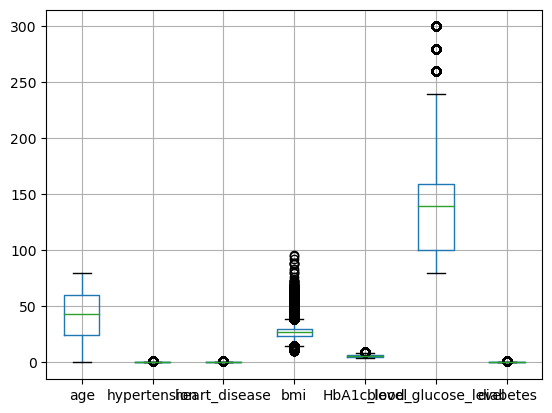

In [14]:
df.boxplot()

In [15]:
#Let’s divide the columns into numerical (having int/float dtypes) or categorical (object dtype):

num_cols = ["age","hypertension","heart_disease","bmi","HbA1c_level", "blood_glucose_level", "diabetes"]
cat_cols = ["gender","smoking_history"]

In [16]:
num_cols

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [17]:
cat_cols

['gender', 'smoking_history']

In [18]:
#4) Numerical features analysis

ValueError: num must be 1 <= num <= 6, not 7

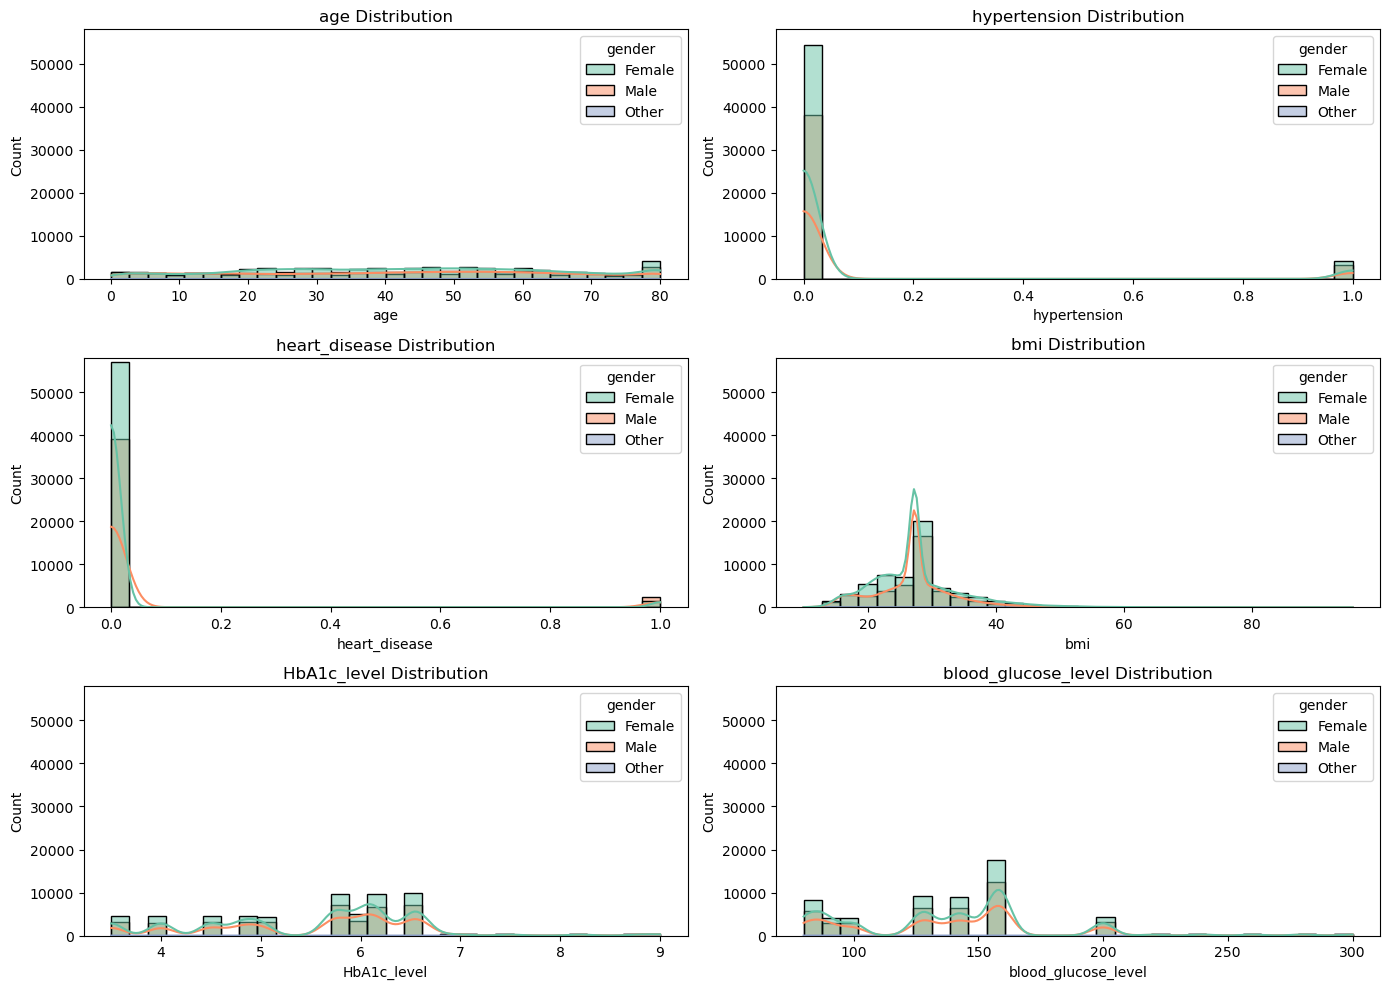

In [19]:
plt.figure(figsize=(14,10))
for idx,column in enumerate(num_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="gender", data=df,bins=30,kde=True,palette="Set2")
    
    plt.title(f"{column} Distribution")
    plt.ylim(0,58000)
    plt.tight_layout()

In [ ]:
#With hue="gender", at a first glance, we see that female tend to be more affected by hypertension, have higher HbA1c level and also higher blood glucose level. Male tend to have more heart disease. Also, female tend to have higher BMI values than male.

In [20]:
#4a) Gender

df["gender"].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

<AxesSubplot:xlabel='diabetes', ylabel='Count'>

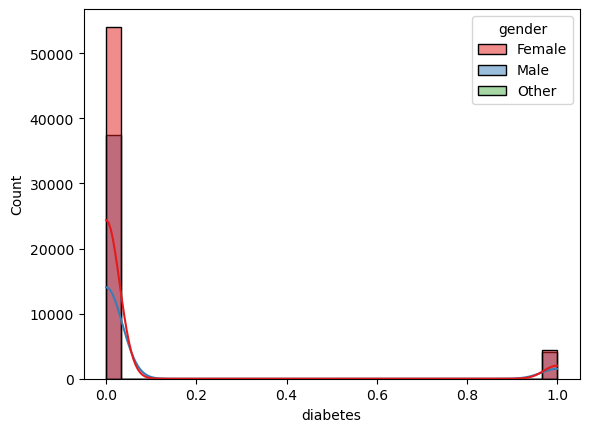

In [21]:
sns.histplot(data=df, x="diabetes",hue="gender",bins=30,kde=True,palette="Set1")

In [22]:
#Slightly more female having diabetes than male in our database. Anyway, let’s consider that our database has almost 58.5% woman and 41.4% men, and that female diabetes patients are just a little more than man suffering diabetes. It looks like men may be having higher diabetes incidence than female.

In [23]:
df["diabetes"].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [24]:
df.groupby(by = ['gender','diabetes']).count()

age  hypertension  heart_disease  smoking_history    bmi  \
gender diabetes                                                               
Female 0         54091         54091          54091            54091  54091   
       1          4461          4461           4461             4461   4461   
Male   0         37391         37391          37391            37391  37391   
       1          4039          4039           4039             4039   4039   
Other  0            18            18             18               18     18   

                 HbA1c_level  blood_glucose_level  
gender diabetes                                    
Female 0               54091                54091  
       1                4461                 4461  
Male   0               37391                37391  
       1                4039                 4039  
Other  0                  18                   18

In [25]:
#4461 women with diabetes and 4039 men with diabetes. 18 people with diabetes identified as ‘Other’, so it’s very marginal and we can skip it.
#We are having a strong hint that male should be more affected by diabetes than female, even if female tend to have higher BMI values, higher blood glucose levels, higher hypertension and higher HbA1c values. Gender must hence have some impact on the diabetes target variable.

<AxesSubplot:xlabel='blood_glucose_level', ylabel='Count'>

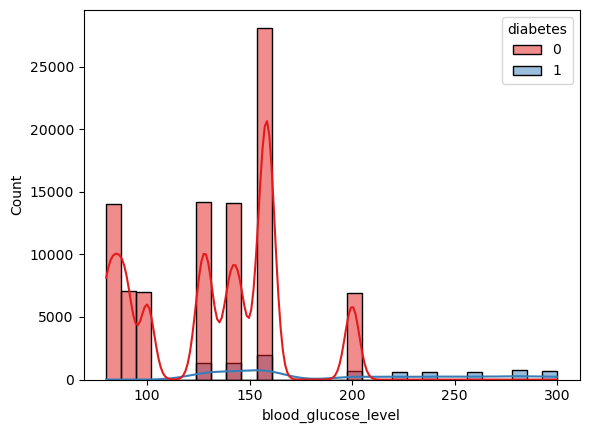

In [26]:
#4b) Blood glucose level

sns.histplot(data=df, x="blood_glucose_level",hue="diabetes",bins=30,kde=True,palette="Set1")

In [27]:
#With 100<blood glucose level<175, there is some incidence on diabetes, and interestingly where the most cases are distributed. From blood glucose levels above 210, almost every observation is about diabetic people.

In [28]:
df["blood_glucose_level"].value_counts()

130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: blood_glucose_level, dtype: int64

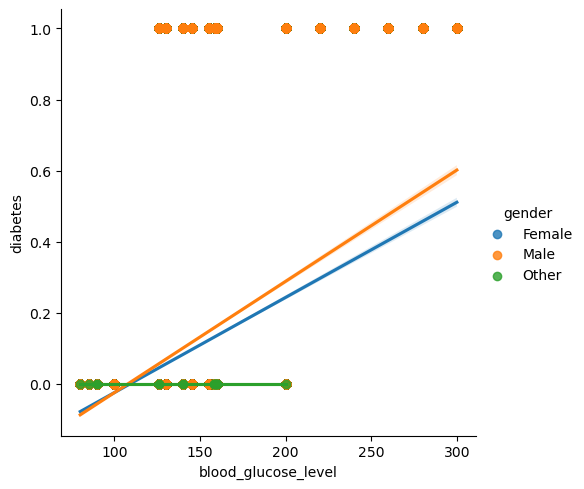

In [29]:
sns.lmplot(data=df, x="blood_glucose_level", y="diabetes", hue="gender")

In [ ]:
#Also, within the correlation (0.42) between blood glucose and diabetes, we can see men tend to have more diabetes than female.

<AxesSubplot:xlabel='HbA1c_level', ylabel='blood_glucose_level'>

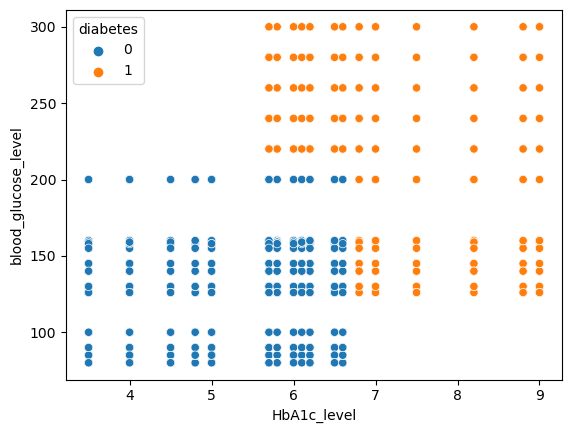

In [30]:
sns.scatterplot(data=df, x= "HbA1c_level", y="blood_glucose_level", hue = "diabetes")

In [31]:
#High levels of blood glucose and HbA1c combined lead to diabetes. As we saw in the correlation matrix, these two features have the highest positive correlation to our target variable 'diabetes'

<AxesSubplot:xlabel='smoking_history', ylabel='blood_glucose_level'>

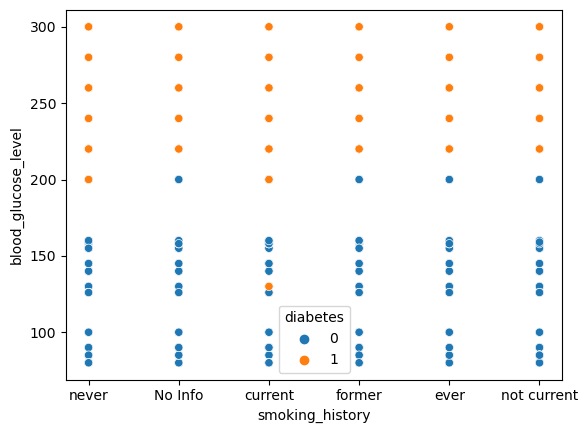

In [32]:
sns.scatterplot(data=df, x= "smoking_history", y="blood_glucose_level", hue = "diabetes")

In [ ]:
#High blood glucose levels seem to drive diabetes, more than smoking habits. There is the exception of some current smokers, with blood glucose levels not so high, having diabetes though.

<AxesSubplot:xlabel='gender', ylabel='HbA1c_level'>

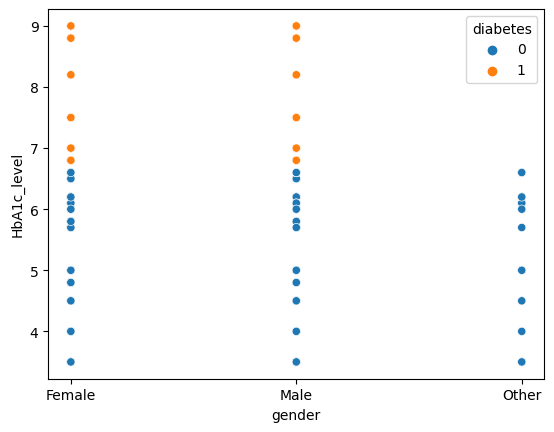

In [33]:
sns.scatterplot(data=df, x="gender", y="HbA1c_level", hue = "diabetes")

In [ ]:
#It seems like there is not a strong gender effect on diabetes, according to HbA1c levels (the higher, the more diabetes cases, no matter the gender of the patient).

<AxesSubplot:xlabel='bmi', ylabel='Count'>

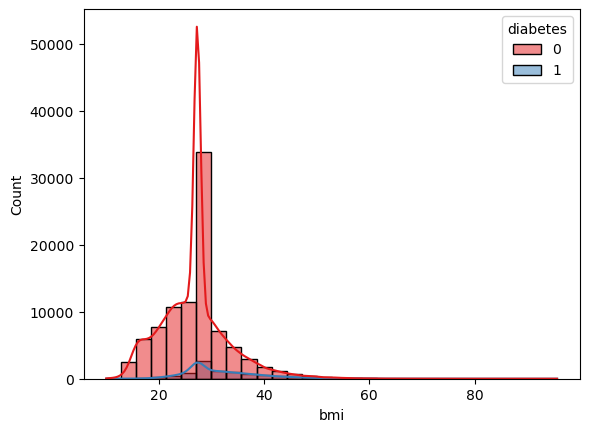

In [34]:
#4c) BMI

sns.histplot(data=df, x="bmi",hue="diabetes",bins=30,kde=True,palette="Set1")

In [ ]:
#Most diabetes cases nest around a bit more than BMI=25.

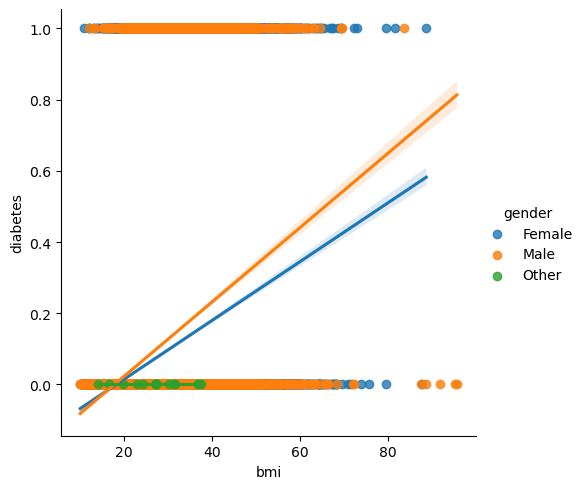

In [35]:
sns.lmplot(data=df, x="bmi", y="diabetes", hue="gender")

In [ ]:
#Also within the small (0.21) correlation within bmi and diabetes, male tend to have more diabetes along higher bmi than female. From bmi>20, higher incidence of diabetes for male.

<AxesSubplot:xlabel='bmi', ylabel='HbA1c_level'>

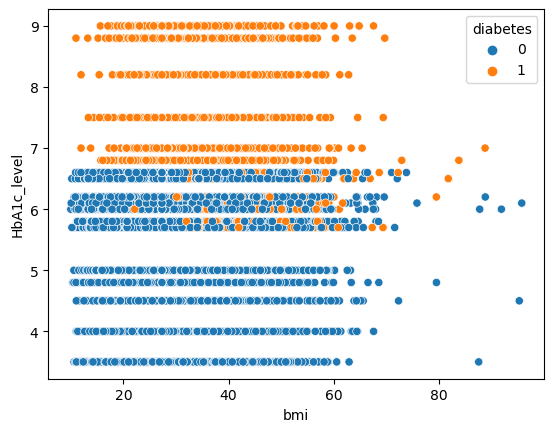

In [36]:
sns.scatterplot(data=df, x="bmi", y="HbA1c_level", hue ="diabetes")

In [ ]:
#High levels of BMI don’t necessarily relate to diabetes. This happens instead when HbA1c levels go above 6 (HbA1c levels seem to drive diabetes much more than BMI).

<AxesSubplot:xlabel='bmi', ylabel='blood_glucose_level'>

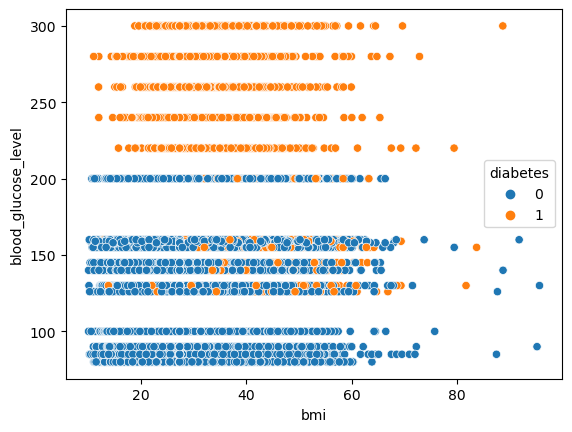

In [37]:
sns.scatterplot(data=df, x="bmi", y="blood_glucose_level", hue = "diabetes")

In [ ]:
#High BMI values increase the chance of getting diabetes, especially with intermediate blood glucose levels. Still, high blood glucose are far more decisive into having diabetes, regardless of the BMI.

<AxesSubplot:xlabel='HbA1c_level', ylabel='Count'>

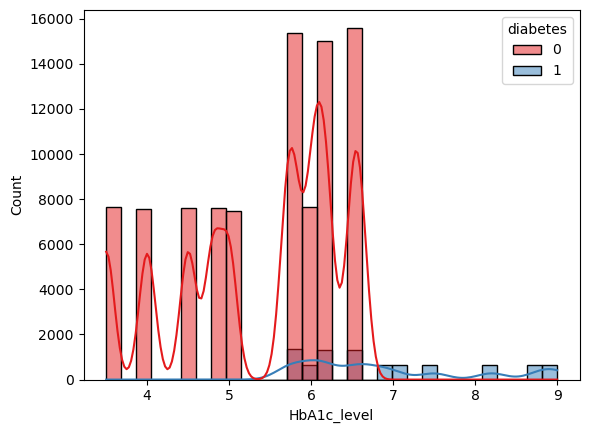

In [38]:
#4d) Hb1AC_level

sns.histplot(data=df, x="HbA1c_level",hue="diabetes",bins=30,kde=True,palette="Set1")

In [ ]:
#Apparently, HbA1c_level>5.3 leads to more diabetic cases. From HbA1c_level>7, almost all cases are diabetes.

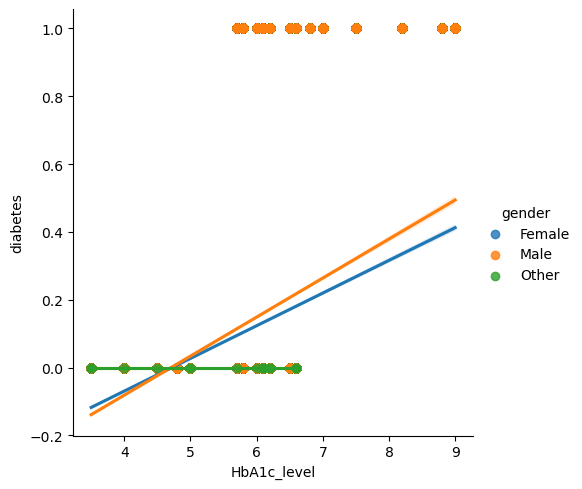

In [39]:
sns.lmplot(data=df, x="HbA1c_level", y="diabetes", hue="gender")

In [ ]:
#HbA1c_level and diabetes have significant positive correlation (0.40). Still, from HbA1c_level>4.7, male tend to have more diabetes than female.

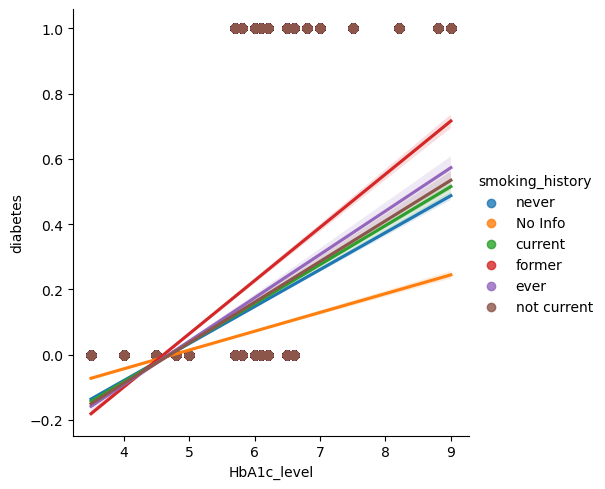

In [40]:
sns.lmplot(data=df, x="HbA1c_level", y="diabetes", hue="smoking_history")

In [ ]:
#It looks like smoking has a positive influence within the positive correlation of HbA1c_level and diabetes.

#So far, we can confirm HbA1c and blood glucose have the most impact on diabetes. This is also reflected on the other features, as we're about 

<AxesSubplot:xlabel='HbA1c_level', ylabel='Count'>

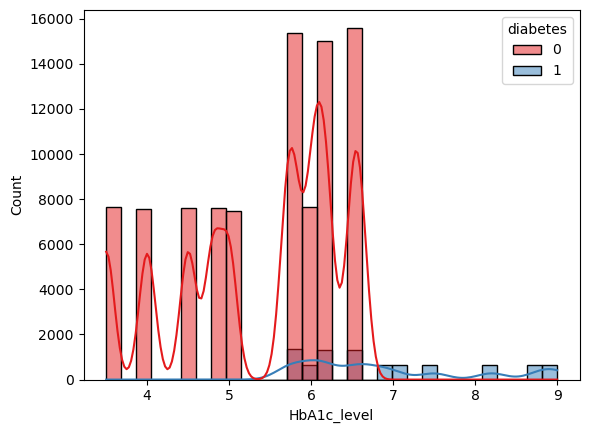

In [41]:
#4e) Hypertension

sns.histplot(data=df, x="HbA1c_level",hue="diabetes",bins=30,kde=True,palette="Set1")

In [ ]:
#Little correlation (0.2) between hypertension and diabetes. Again, more slight more tendency for men to suffer hypertension and diabetes, and also smoking is correlated.

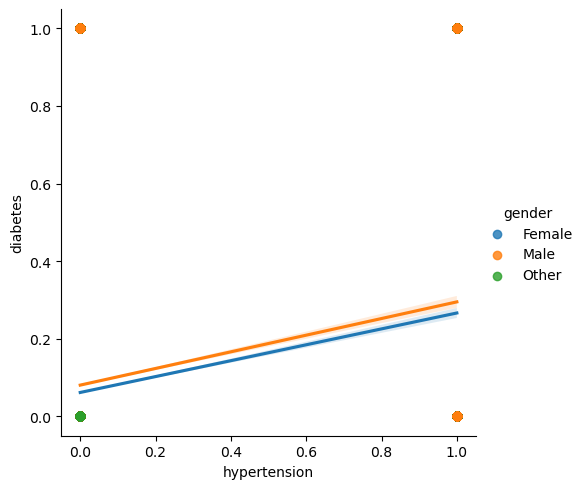

In [42]:
sns.lmplot(data=df, x="hypertension", y="diabetes", hue="gender")

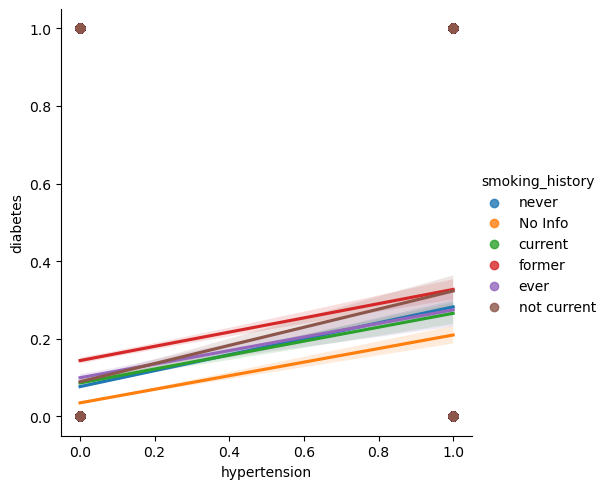

In [43]:
sns.lmplot(data=df, x="hypertension", y="diabetes", hue="smoking_history")

<AxesSubplot:xlabel='hypertension', ylabel='blood_glucose_level'>

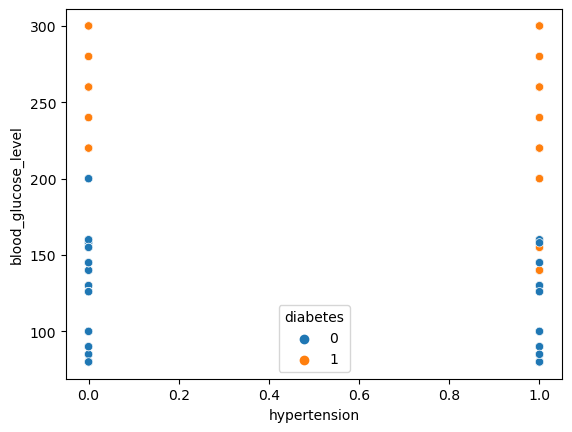

In [44]:
sns.scatterplot(data=df, x="hypertension", y="blood_glucose_level", hue ="diabetes")

In [ ]:
#According to hypertension, there are more diabetic cases even with lower blood glucose levels. Again, high blood glucose drives diabetes more.

<AxesSubplot:xlabel='hypertension', ylabel='HbA1c_level'>

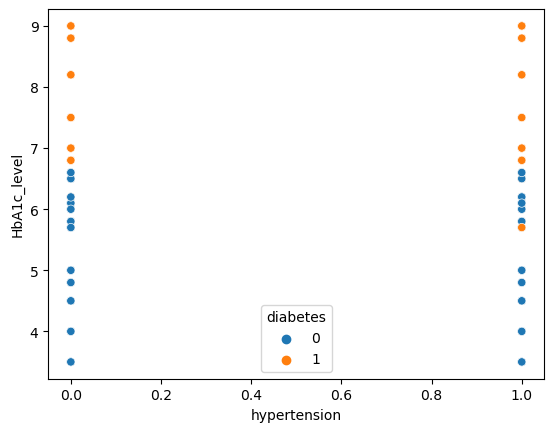

In [45]:
sns.scatterplot(data=df, x="hypertension", y="HbA1c_level", hue="diabetes")

In [ ]:
#Even here, hypertension contributes some diabetes cases even at intermediate HbA1c levels. Still, high HbA1c levels are bringing more diabetes cases.

<AxesSubplot:xlabel='heart_disease', ylabel='Count'>

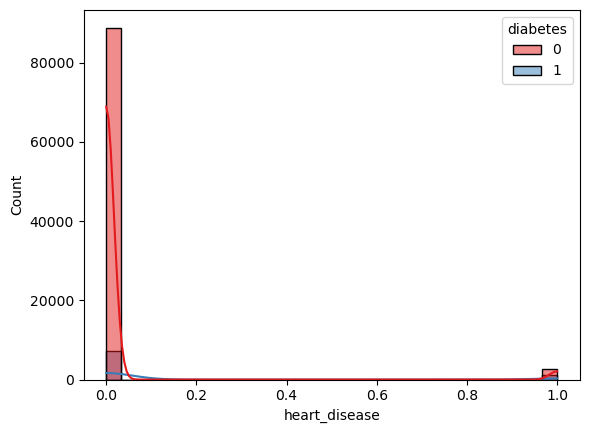

In [46]:
#4f) Heart_disease

sns.histplot(data=df, x="heart_disease",hue="diabetes",bins=30,kde=True,palette="Set1")

In [ ]:
#Within the little correlation (0.17) between heart_disease and diabetes, there is more tendency for women to be diabetic than on men, the opposite we have seen so far.
# Again, smoking goes along with the correlation of having heart disease and diabetes.

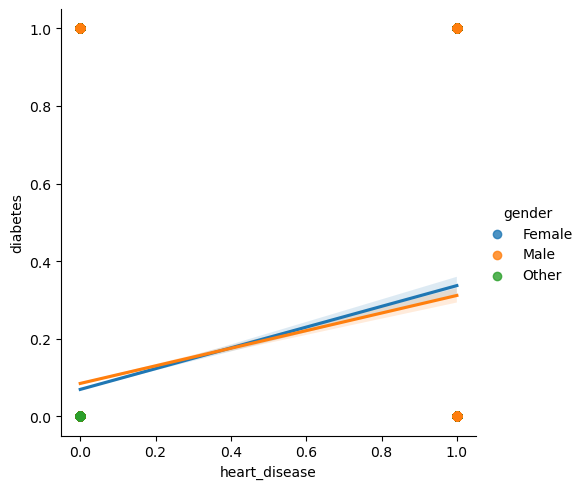

In [47]:
sns.lmplot(data=df, x="heart_disease", y="diabetes", hue="gender")

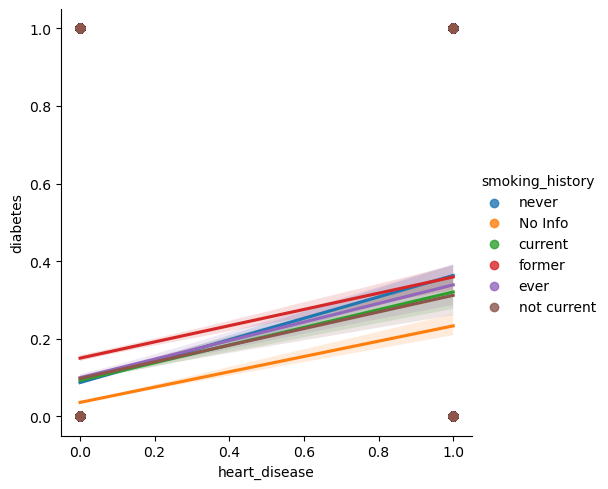

In [48]:
sns.lmplot(data=df, x="heart_disease", y="diabetes", hue="smoking_history")

<AxesSubplot:xlabel='heart_disease', ylabel='blood_glucose_level'>

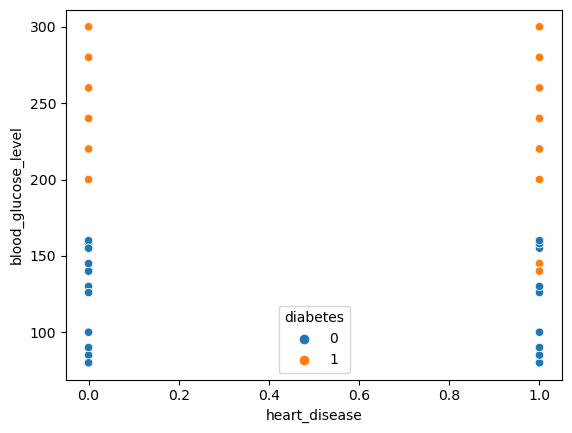

In [49]:
sns.scatterplot(data=df, x="heart_disease", y="blood_glucose_level", hue ="diabetes")

In [ ]:
#Heart disease slinked to diabetes cases even with lower blood glucose levels. Anyway, high blood glucose is connected to diabetes regardless of heart diseases.

<AxesSubplot:xlabel='heart_disease', ylabel='HbA1c_level'>

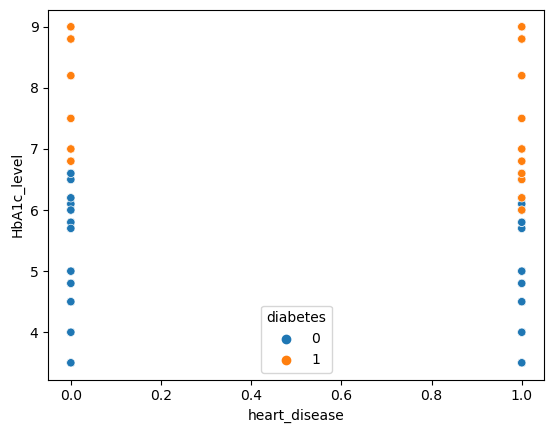

In [50]:
sns.scatterplot(data=df, x="heart_disease", y="HbA1c_level", hue ="diabetes")

In [ ]:
#Given that high values (around >7) of HbA1c are linked to diabetes no matter what the heart diseases, if the individual had heart issues, it may arise diabetes even with HbA1c levels around 6.

<AxesSubplot:xlabel='age', ylabel='Count'>

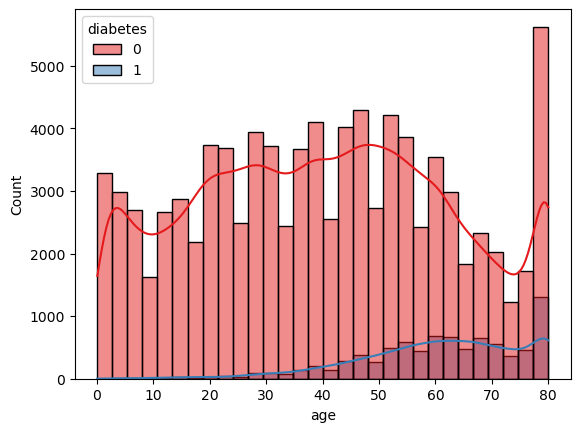

In [51]:
#4g) Age

sns.histplot(data=df, x="age",hue="diabetes",bins=30,kde=True,palette="Set1")

In [ ]:
#In our dataset, older people tend to have diabetes more.

<AxesSubplot:xlabel='age', ylabel='blood_glucose_level'>

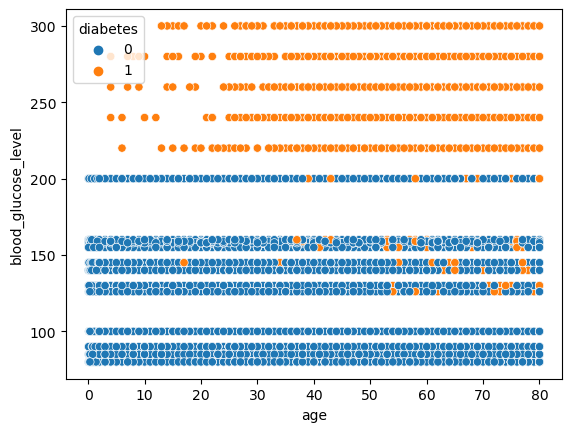

In [52]:
sns.scatterplot(data=df, x="age", y="blood_glucose_level", hue = "diabetes")

In [ ]:
#Age seem to be a risk factor for diabetes only when older, but definitely not contributing as much as high blood glucose levels.

<AxesSubplot:xlabel='age', ylabel='HbA1c_level'>

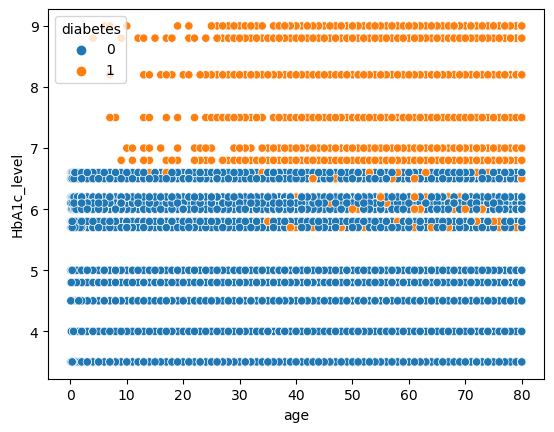

In [53]:
sns.scatterplot(data=df, x="age", y="HbA1c_level", hue ="diabetes")

In [ ]:
#Older age has little effect on diabetes on intermediate HbA1c levels, although higher HbA1c values actually impact way more on having diabetes than age itself.

<AxesSubplot:xlabel='age', ylabel='gender'>

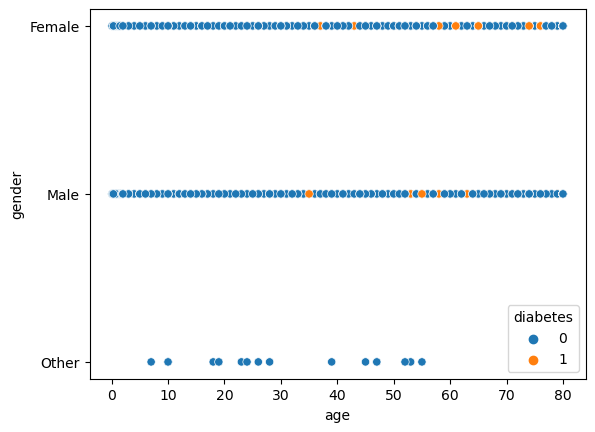

In [54]:
sns.scatterplot(data=df, x="age", y="gender", hue ="diabetes")


In [ ]:
#It seems like roughly gender doesn’t impact much having diabetes according to age. Similar diabetes cases happen in similar age buckets for both male and female, except higher diabetes incidence for women over 70 years old.

<AxesSubplot:xlabel='age', ylabel='bmi'>

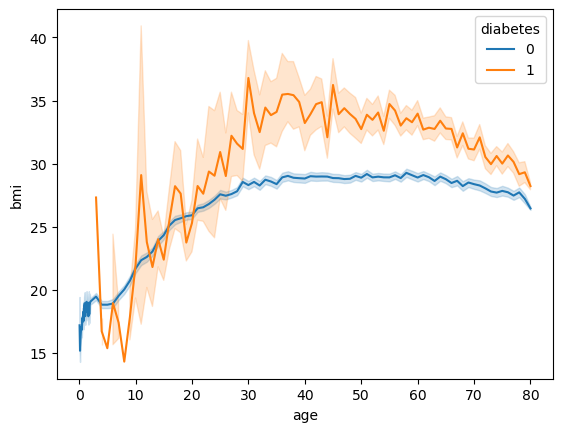

In [55]:
sns.lineplot(data=df, x="age", y="bmi", hue ="diabetes")

In [ ]:
#After age 20, diabetes cases happen with BMI>25.

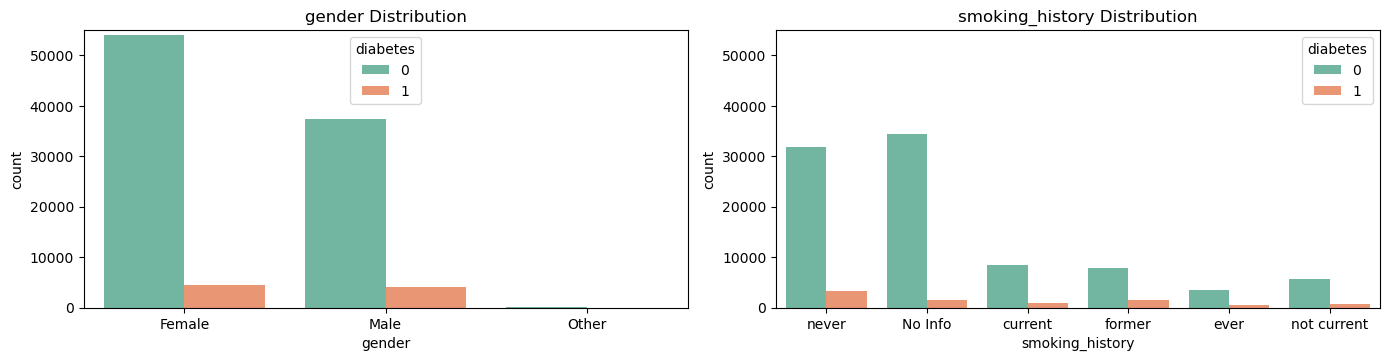

In [56]:
#5) Categorical features analysis

plt.figure(figsize=(14,10))
for idx,column in enumerate(cat_cols):
    plt.subplot(3,2,idx+1)
    sns.countplot(x=column, hue="diabetes", data=df ,palette="Set2")
    
    plt.title(f"{column} Distribution")
    plt.tight_layout()
    plt.ylim(0,55000)

In [ ]:
#Surprisingly, within the smoking_history feature, the more observations of diabetic individuals belong to persons who never smoked or who used to smoke. Within gender, we see that female and male share almost the same observations of diabetic people, even though the dataset features 58.5% women and 41.5% men.

<AxesSubplot:xlabel='smoking_history', ylabel='count'>

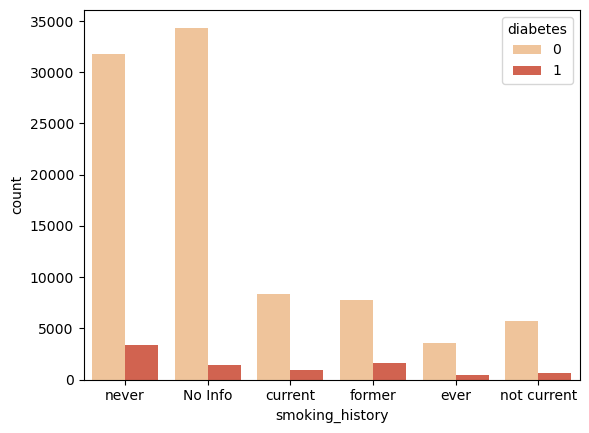

In [58]:
sns.countplot(x="smoking_history", hue="diabetes", data=df ,palette="OrRd")

In [59]:
#Separate countplot for smoking_history, hued by diabetes.

<AxesSubplot:xlabel='smoking_history', ylabel='count'>

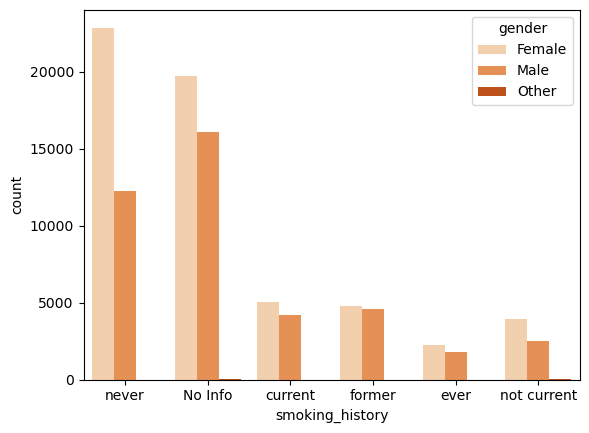

In [61]:
sns.countplot(x="smoking_history", hue="gender", data=df ,palette="Oranges")

In [62]:
#Gender distribution for the smoking_history feature

In [ ]:
#6) Chi-Squared test (for categorical features)

In [64]:
df_cat=df[['gender','smoking_history','diabetes']] 
df_cat.head()

,gender,smoking_history,diabetes
0,Female,never,0
1,Female,No Info,0
2,Male,never,0
3,Female,current,0
4,Male,current,0


In [65]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat.columns:
    le = LabelEncoder()
    df_cat[col]= le.fit_transform(df_cat[col])

df_cat.head()

/var/folders/t3/9f4_1rvd0zq18r6tpxq933zw0000gn/T/ipykernel_15238/2786341957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col]= le.fit_transform(df_cat[col])


,gender,smoking_history,diabetes
0,0,4,0
1,0,0,0
2,1,4,0
3,0,1,0
4,1,1,0


In [66]:
#Now we have the categorical data frame with numerical values.

In [71]:
from sklearn.feature_selection import chi2

X=df_cat.drop(columns=['diabetes'], axis=1)
y=df_cat['diabetes']

In [72]:
#Let’s calculate the Chi-Squared scores:

chi_scores=chi2(X,y)
chi_scores

(array([  82.04514201, 1456.48776861]),
 array([1.33013709e-19, 0.00000000e+00]))

In [ ]:
#Upper array: Chi-square values (the higher the value, the more important the y target variable against the dependent variable)
#Lower array: p-values (the higher the p-value of the dependent variable, it means that such variable is independent, and hence less important against the y target variable).

<AxesSubplot:>

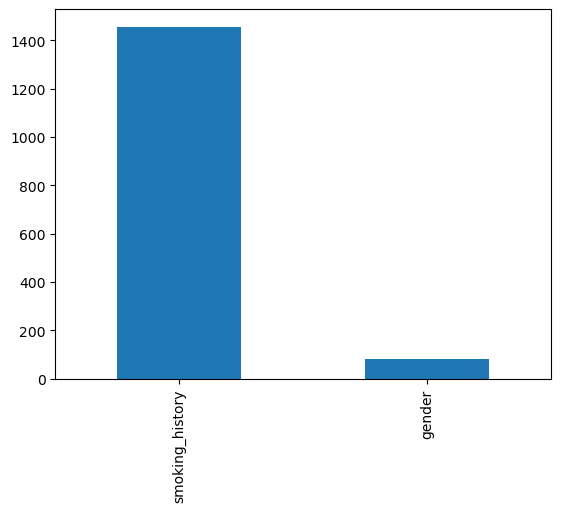

In [73]:
#Let’s now plot the chi square values (higher the Chi square value, higher the importance):

chi_values=pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

In [ ]:
#Higher chi-square value: the higher the importance of such variable against the target variable y (‘diabetes’). It looks like ‘smoking_history’ is more relevant than ‘gender’.

<AxesSubplot:>

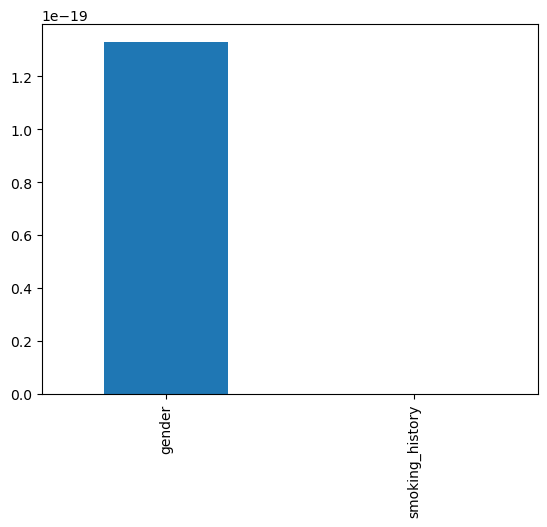

In [74]:
#Now let’s plot the p-values (lower the p-value, higher the importance):

p_values=pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

In [75]:
#If p-value>0.05, then it has lower importance (viceversa, if p-value<0.05, then we accept H1 -> the dependent variables have some effect on the y target variable).
#The p-value (1e-19) of ‘gender’ is bigger than p-value (=0.05), hence we can drop it as it’s independent to our target variable ‘disease’. 


In [ ]:
#7) Model training - Random Forest Classifier

In [78]:
features = ['heart_disease', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_history']

In [81]:
# We excluded ’gender’, as we have checked to be not significant through the Chi Squared test.
#Let's apply dummies, so we can have numerical values for every single ‘smoking_history’ feature

X = pd.get_dummies(df[features])

In [83]:
X.sample()

,heart_disease,hypertension,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
70213,1,1,28.89,9.0,140,0,0,0,0,1,0


In [84]:
y = df['diabetes']

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

X_train.shape, X_test.shape

((70000, 11), (30000, 11))

In [87]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

In [89]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9715666666666667